Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

# Least-Squares Fit

Data obtained from experiments can contain a significant amount of random noise. We may wish to find a smooth curve that fits the data points on average. Ideally this curve should have a simple form (such as a low-order polynomial), so as to not reproduce the noise.

Consider the following function that will be used to fit a data set

$$\hat{y}(x) = \hat{y}(x;a_{1},a_{2},\ldots,a_{m}) = a_{1}f_{1}(x) + a_{2}f_{2}(x) + \ldots + a_{m}f_{m}(x)$$

where $a_{1}, a_{2}, \ldots, a_{m}$ are variable paramters. The data set consists of the points

$$(x_{1},y_{1}),~(x_{2},y_{2}),\ldots(x_{n},y_{n})$$

where $m < n$. The form of $\hat{y}(x)$ is determined beforehand, ususally from the theory associated with the experiment from which the data was obtained. Therefore, the only means of adjusting the fit are the parameters themselves. The estimation of the data at each data point $x_{i}$ for is shown as

$$\begin{align}
    \hat{y}(x_{1}) &= a_{1}f_{1}(x_{1}) + a_{2}f_{2}(x_{1}) + \ldots + a_{m}f_{m}(x_{1}) \nonumber \\
    \hat{y}(x_{2}) &= a_{1}f_{1}(x_{2}) + a_{2}f_{2}(x_{2}) + \ldots + a_{m}f_{m}(x_{2}) \nonumber \\
    &\vdots \nonumber \\
    \hat{y}(x_{n}) &= a_{1}f_{1}(x_{n}) + a_{2}f_{2}(x_{n}) + \ldots + a_{m}f_{m}(x_{n}) \nonumber \\
\end{align}$$

In other words,


$$y \approx \hat{y} = Ax ~~~\implies~~~

\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}

\approx

\begin{bmatrix}
    \hat{y}_1 \\
    \hat{y}_2 \\
    \vdots \\
    \hat{y}_n
\end{bmatrix}

=

\begin{bmatrix}
    f_{1}(x_{1}) & f_{2}(x_{1}) & \ldots & f_{m}(x_{1})\\
    f_{1}(x_{2}) & f_{2}(x_{2}) & \ldots & f_{m}(x_{2})\\
    \vdots       &      \vdots  & \ddots &       \vdots\\
    f_{1}(x_{n}) & f_{2}(x_{n}) & \ldots & f_{m}(x_{n})\\
\end{bmatrix}

\begin{bmatrix}
    a_{1} \\
    a_{2} \\
    \vdots \\
    a_{m} \\
\end{bmatrix}$$

The least-squares prolem seeks accomplish the following optimization problem

$$min \sum_{i=1}^{n}\left(y_{i} - \hat{y}_{i}\right)^{2}$$

The solution to this least-squares problem is

$$\boxed{x = \left(A^{T}A\right)^{-1}A^{T}y}$$

# Nonlinear Least-Squares: Exponentials

Suppose we want to fit data with an exponential curve. How does this change our approach compared to the simpler linear least-squares problem? Consider the following equation

$$y(x) = ae^{bx}$$

Recall the general form for a fitting function whose coefficients we wish to solve for. Notice that the exponential does not let us apply this form directly.

$$\hat{y}(x) = a_{1}f_{1}(x) + a_{2}f_{2}(x) + \ldots + a_{m}f_{m}(x)$$

We can use the properties of logarithms to our advantage and reshape this equation into a more suitable form. Start by taking the logarithm of both sides.

$\begin{align}
\ln{y} &= \ln{ae^{bx}} \nonumber \\
&= \ln{a} + \ln{e^{bx}} \nonumber \\
&= \ln{a} + bx \nonumber
\end{align}$

Since $\ln{a}$ is a constant, we can treat this new equation as a monomial linear least-squares solution. It is important to note that when we fit this equation, we are looking for a solution that minimizes $\left(y - \hat{y}\right)^{2}$ but rather $\left(\ln{y} - \ln{\hat{y}}\right)^{2}$. A familiar equation emerges when we define $c = \ln{a}$ and treat it as one of our unknown coefficients. We can see this plainly when we set up our system of equations in matrix form.

$$\ln{\hat{y}} = Ax$$

$$\begin{bmatrix}
    \ln{y_1} \\
    \ln{y_2} \\
    \vdots   \\
    \ln{y_n} \\
\end{bmatrix}

=

\begin{bmatrix}
    1 & x_{1}  \\
    1 & x_{2}  \\
    \vdots & \vdots \\
    1 & x_{n}  \\
\end{bmatrix}

\begin{bmatrix}
    c \\
    b \\
\end{bmatrix}$$

This now becomes a problem we can easily solve by taking the pseudoinverse of A and applying it to $\ln{\hat{Y}}$. Doing this will supply us with the optimal coefficient vector which contains $c$ and $b$. Recall how we defined $c$ and realize that we can use it to solve for $a$ with the equation $a = e^{c}.$

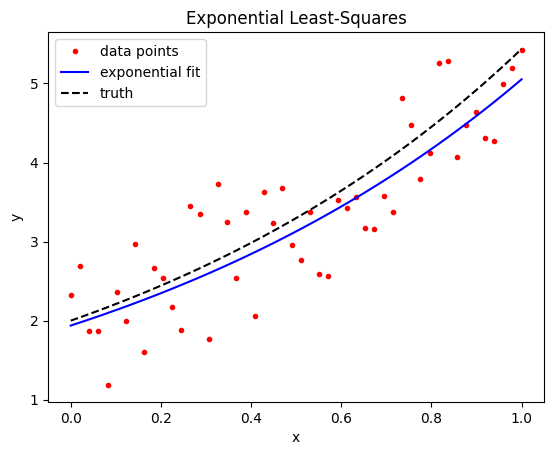

In [17]:
x = np.linspace(0,1,50)
yTrue = 2*np.exp(x)
noise = rnd.random(len(x))*rnd.choice([-1,1],len(x))
yMeas = yTrue + noise

A = np.vstack([np.ones_like(x), x]).T
c = np.linalg.inv(A.T @ A) @ A.T @ np.log(yMeas)
c = np.linalg.pinv(A) @ np.log(yMeas)
yHat = np.exp(c[0]) * np.exp(c[1]*x)

plt.plot(x,yMeas,'r.',label='data points')
plt.plot(x,yHat,'b-',label='exponential fit')
plt.plot(x,yTrue,'k--',label='truth')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Least-Squares')
plt.legend()
plt.show()

# Nonlinear Least-Squares: Harmonics

Suppose we also wish to fit data that would be best represented by harmonic behavior. This problem is similar in nature to that of the exponential least-squares as we cannot directly apply the general form of the fitting function.

$$\hat{y}(x) = A_{1}\sin{\left(\omega_{1}x+\phi_{1}\right)} + A_{2}\sin{\left(\omega_{2}x+\phi_{2}\right)} + \ldots + A_{m}\sin{\left(\omega_{m}x+\phi_{m}\right)}$$

Similar to taking advantage of logarithmic properties in the exponential case, we can take advantage of trigonometric identities to transform this equation into a form with linear constants that we can solve for. Recall the following trigonometric identities

$$\begin{align}
    \cos{(a \pm b)} &= \cos{a}\cos{b} \mp \sin{a}\sin{b} \nonumber \\
    \sin{(a \pm b)} &= \sin{a}\cos{b} \pm \cos{a}\sin{b} \nonumber \\
\end{align}$$

We can use the second equation for the above example that uses sines. By applying this equation, we are eliminating the $\phi$ in within the trigonometric function and instead obtaining another constant that linearly scales a summed component.

$$\hat{y}(x) = \left[\alpha_{1}\sin{\left(\omega_{1}x\right)} + \beta_{1}\cos{\left(\omega_{1}x\right)}\right] + \left[\alpha_{2}\sin{\left(\omega_{2}x\right)} + \beta_{2}\cos{\left(\omega_{2}x\right)}\right] + \ldots + \left[\alpha_{m}\sin{\left(\omega_{m}x\right)} + \beta_{m}\cos{\left(\omega_{m}x\right)}\right]$$

where the following substitution was made

$$\alpha_{i} = A_{i}\cos{\phi_{i}}, ~~~~~ \beta_{i} = A_{i}\sin{\phi_{i}}$$

We can now convert this into the familiar matrix form of the least-squares problem.

$$\begin{bmatrix}
    \hat{y}_1 \\
    \hat{y}_2 \\
    \vdots \\
    \hat{y}_n
\end{bmatrix}

=

\begin{bmatrix}
    \sin{\left(\omega_{1}x_{1}\right)} & \cos{\left(\omega_{1}x_{1}\right)} & \sin{\left(\omega_{2}x_{1}\right)} & \cos{\left(\omega_{2}x_{1}\right)} & \ldots & \sin{\left(\omega_{m}x_{1}\right)} & \cos{\left(\omega_{m}x_{1}\right)}\\
    \sin{\left(\omega_{1}x_{2}\right)} & \cos{\left(\omega_{1}x_{2}\right)} & \sin{\left(\omega_{2}x_{2}\right)} & \cos{\left(\omega_{2}x_{2}\right)} & \ldots & \sin{\left(\omega_{m}x_{2}\right)} & \cos{\left(\omega_{m}x_{2}\right)}\\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
    \sin{\left(\omega_{1}x_{n}\right)} & \cos{\left(\omega_{1}x_{n}\right)} & \sin{\left(\omega_{2}x_{n}\right)} & \cos{\left(\omega_{2}x_{n}\right)} & \ldots & \sin{\left(\omega_{m}x_{n}\right)} & \cos{\left(\omega_{m}x_{n}\right)}\\
\end{bmatrix}

\begin{bmatrix}
    \alpha_{1} \\
    \beta_{1} \\
    \alpha_{2} \\
    \beta_{2} \\
    \vdots \\
    \alpha_{m} \\
    \beta_{m} \\
\end{bmatrix}$$

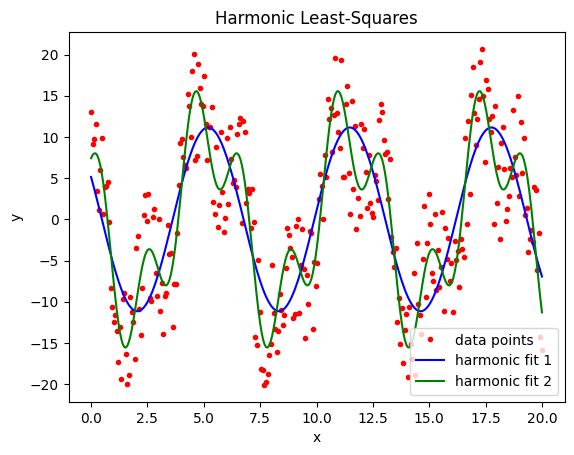

In [33]:
x = np.linspace(0,20,300)
yTrue = 10*np.cos(x + np.pi/3) - 5*np.cos(3*x + 2*np.pi/3)
noise = rnd.random(len(x))*rnd.choice([-1,1],len(x)) * 8
yMeas = yTrue + noise

A1 = np.vstack([np.sin(x),np.cos(x)]).T
c1 = np.linalg.pinv(A1) @ yMeas
yHat1 = c1[0]*np.sin(x) + c1[1]*np.cos(x)

A2 = np.vstack([np.sin(x),np.cos(x),np.sin(3*x),np.cos(3*x)]).T
c2 = np.linalg.pinv(A2) @ yMeas
yHat2 =A2 @ c2

A3 = np.vstack([np.sin(x),np.cos(x),np.sin(3*x),np.cos(3*x),np.sin(6*x),np.cos(6*x)]).T
c3 = np.linalg.pinv(A3) @ yMeas
yHat3 =A3 @ c3

plt.plot(x,yMeas,'r.',label='data points')
plt.plot(x,yHat1,'b-',label='harmonic fit 1')
plt.plot(x,yHat2,'g-',label='harmonic fit 2')
# plt.plot(x,yHat3,'m-',label='harmonic fit 3')
# plt.plot(x,yTrue,'k--',label='truth')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Harmonic Least-Squares')
plt.legend()
plt.show()

# Practical Example: Mass-Spring-Damper System

The well-studied mass-spring-damper problem is governed by the following equation of motion for an unforced system

$$m\ddot{x} + c\dot{x} + kx = 0$$

and the has the general homogeneuos solution for the underdamped case

$$x(t) = C_{1}e^{-\alpha t}\cos{\omega t} + C_{2}e^{-\alpha t}\sin{\omega t}$$

where 

$$\alpha = \frac{c}{2m}, ~~~ \omega = \sqrt{\frac{k}{m} - \left(\frac{c}{2m}\right)^{2}}$$

Let us assume that $m = 10$, $c = 5$, and $k = 20$ as well as the initial conditions $x(0) = 1$ and $\dot{x}(0) = 2$. Apply the following form

$$x(t) = x_{0}e^{-\alpha t}\cos{\omega t} + \frac{\dot{x}_{0} + \alpha x_{0}}{\omega}e^{-\alpha t}\cos{\omega t}$$

In [4]:
# given values
m = 10
c = 5
k = 20

alpha = c / (2*m)
omega = np.sqrt(k/m - (c/(2*m))**2)

x0 = 1
dx0 = 2

##########
# SOLUTION
##########

In [5]:
#############
# PLOT ERRORS
#############

# Orthogonality and Legendre & Chebychev Polynomials

### Orthogonality
Where Lagrange polynomials and monomials formed a linearly independent basis for a polynomial curve, Legendre and Chebychev polynomials have the additional benefit of being sets of orthogonal functions. By definition, an orthogonal polynomial sequence in a family of polynomials such that two different polynomials in the sequence are orthogonal to each other under some inner product. Two vectors $x$ and $y$ are said to be orthogonal if their inner product is zero, that is, 

$$\langle x,y \rangle = 0$$

Both Legendre and Chebychev polynomials can be used to fit or interpolate data.

### Legendre Polynomials

The orthogonality of Legendre polynomials is defined with respect to the inner product

$$\langle P_{m},P_{n} \rangle = \int_{-1}^{1} P_{m}(x)P_{n}(x)dx = \left\{
\begin{array}{ll}
    0              & \text{if } m\neq n \\
    \frac{2}{2n+1} & \text{if } m=n \\
\end{array}\right.$$

The Legendre polynomials are defined as

$$P_{0}(x) = 1$$

$$P_{1}(x) = x$$

$$P_{k}(x) = \frac{2k-1}{k}xP_{k-1}(x)-\frac{k-1}{k}P_{k-2}(x), ~~~~~ x \in [-1,1]$$


### Chebychev Polynomials

The Chebychev polynomials are two sequences of polynomials related to the cosine and sine functions and are denoted by $T_{n}(x)$ and $U_{n}(x)$. These functions are given by the following equations

$$\left\{
\begin{array}{ll}
    \text{First kind}  & T_{0}(x) = 1  &  T_{1}(x) = x   & T_{k+1}(x) = 2xT_{k}(x) - T_{k-1}(x)\\
    \text{Second kind} & U_{0}(x) = 1  &  U_{1}(x) = 2x  & T_{k+1}(x) = 2xU_{k}(x) - U_{k-1}(x)\\
\end{array}\right.$$

and

$$T_{k}(\cos{\theta}) = \cos{k\theta}, ~~~~~ U_{k}(\cos{\theta})\sin{\theta} = \sin{((k+1)\theta)}$$

These functions are related by their derivatives and integrals such that

$$\frac{dT_{k}}{dx} = kU_{k-1}, ~~~~~ \frac{dU_{k}}{dx} = \frac{(k+1)T_{k+1}-xU_{k}}{x^{2}-1}$$

and

$$\int T_{k}dx = \frac{kT_{k+1}}{k^{2}-1}-\frac{xT_{k}}{k-1}, ~~~~~ \int U_{k}dx = \frac{T_{k+1}}{k+1}$$

The orthogonality of Chebychev polynomials is defined with respect to the inner product

$$\langle T_{m},T_{n} \rangle = \int_{-1}^{1} T_{m}(x)T_{n}(x)\frac{dx}{\sqrt{1-x^{2}}} = \left\{
\begin{array}{ll}
    0     & \text{if } m\neq n \\
    \pi   & \text{if } m=n=0 \\
    \pi/2 & \text{if } m=n\neq 0 \\
\end{array}\right.$$